In [1]:
import HEAD_RECON
import multi_head
import copy
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.morphology import binary_fill_holes
import sys
np.set_printoptions(threshold=sys.maxsize)

%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

image 10


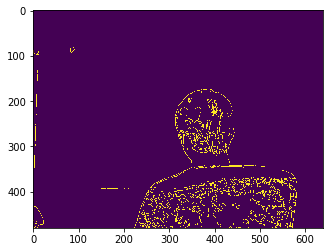

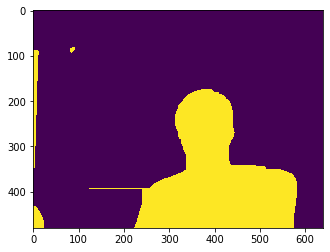

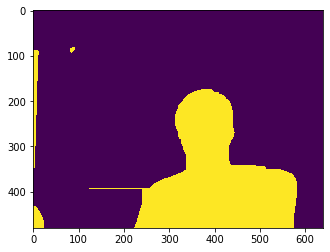

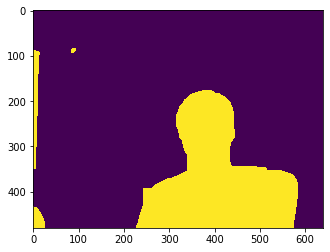

image 11


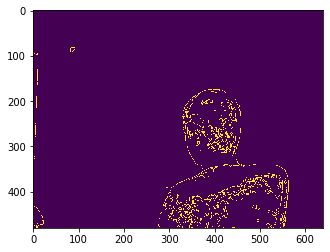

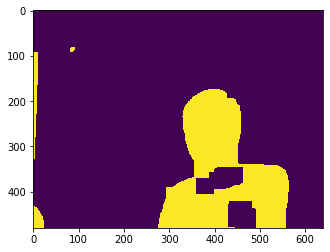

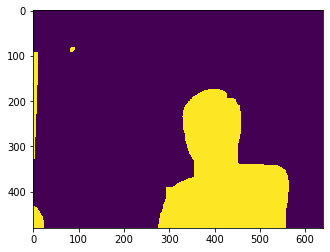

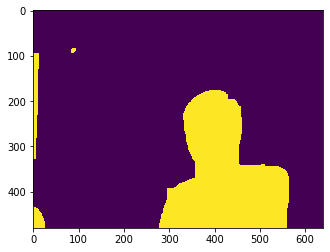

image 12


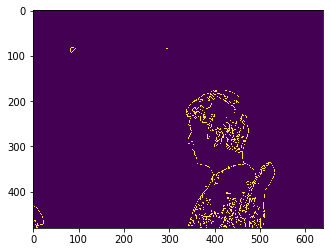

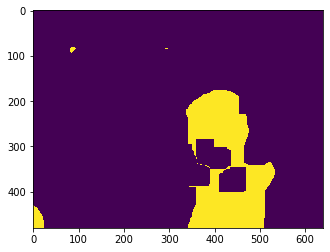

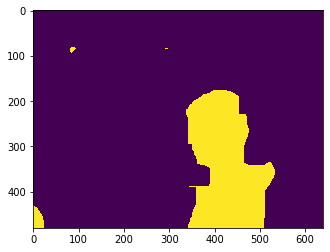

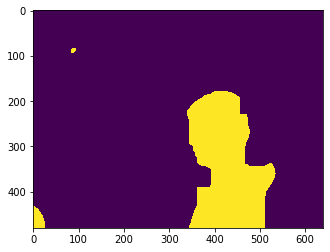

In [20]:
for i in range(10,13):
    print("image {}".format(i))
    rgb_hand = cv2.imread('./head_2d_image/full_1_{}.png'.format(i))
    
#     imgray = cv2.cvtColor(rgb_hand,cv2.COLOR_BGR2GRAY)
#     ret,thresh = cv2.threshold(imgray,127,255,0)

    hsv_hand = cv2.cvtColor(rgb_hand, cv2.COLOR_BGR2HSV)
    s = hsv_hand[:,:,1]
    # cv2.imshow("original",rgb_hand)
    # extract the edge and dilate
    edge = cv2.Canny(s,70,200)
    plt.imshow(edge);plt.show()
    plt.imsave("edge.png",edge)
    kernel = np.ones((3,3))
    # cv2.imshow("edge",edge)
    dilation = cv2.dilate(edge,kernel,iterations =17)
    erode = cv2.erode(dilation,kernel,iterations=17)
    # cv2.imshow("dilation",dilation)
    # 
    # cv2.imshow("closing",closing)
    plt.imshow(erode);plt.show()
    # flood fill
    # im_floodfill = closing.copy()
    erode[479,:] = 255
    im_floodfill = binary_fill_holes(erode)
    im_floodfill = im_floodfill*1
    im_floodfill = np.uint8(im_floodfill)
    plt.imshow(im_floodfill);plt.show()
    kernel = np.ones((4,4))
    dilation = cv2.dilate(im_floodfill,kernel,iterations = 1)
    erode = cv2.erode(dilation,kernel,iterations=1)
    # plt.imshow(dilation);plt.show()
    opening = cv2.morphologyEx(erode, cv2.MORPH_OPEN, np.ones((4,4)))
    plt.imshow(opening);plt.show()

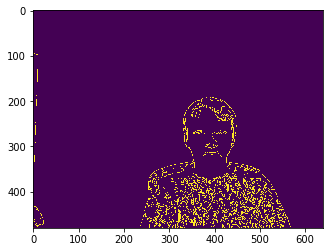

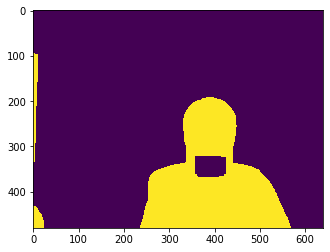

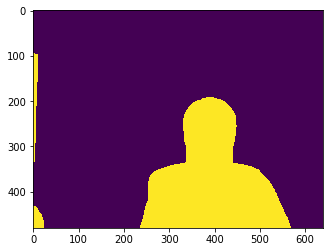

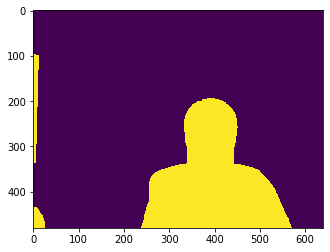

(307200,)
(57491,)
dangling removal done
color filter done.


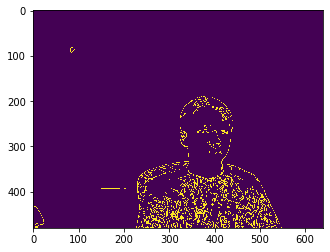

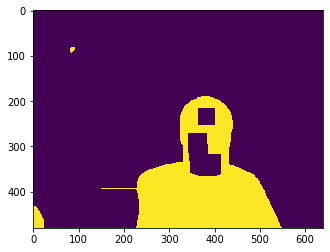

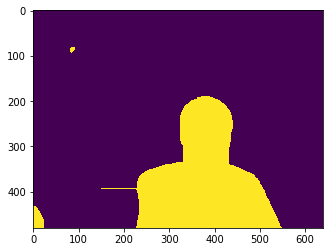

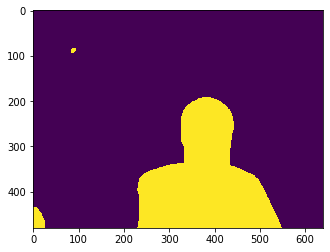

(307200,)
(54904,)
dangling removal done
color filter done.


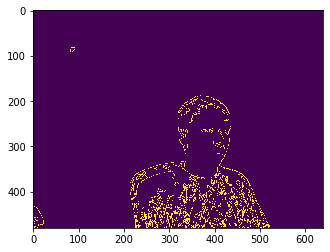

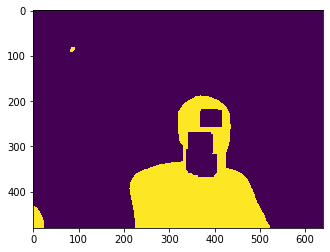

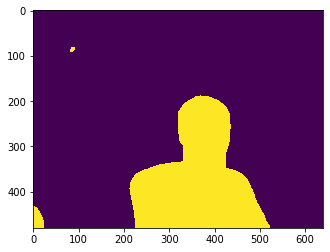

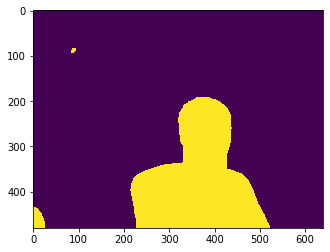

(307200,)
(53048,)
dangling removal done
color filter done.


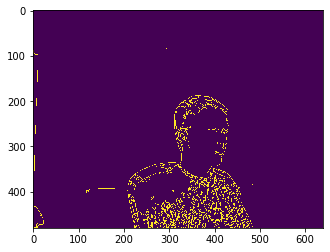

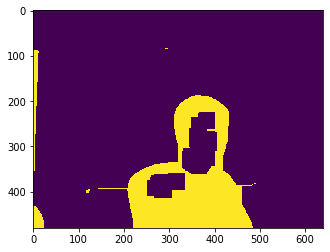

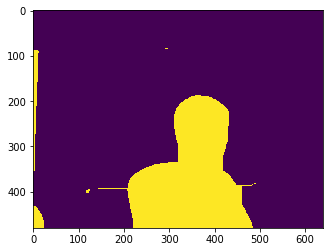

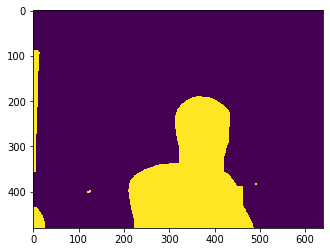

(307200,)
(52737,)
dangling removal done
color filter done.


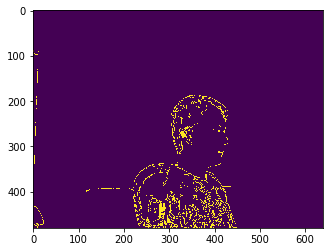

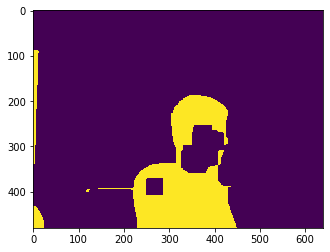

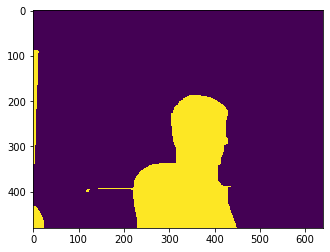

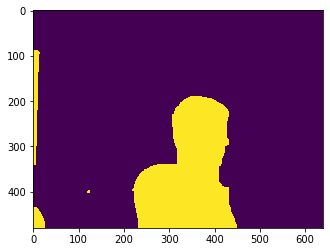

(307200,)
(47865,)
dangling removal done
color filter done.


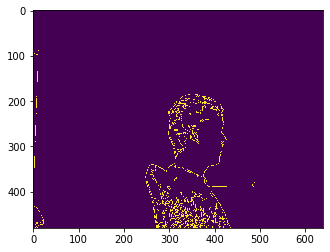

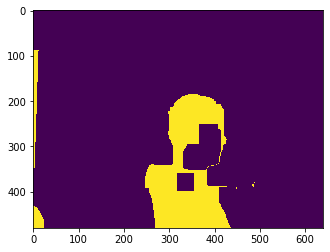

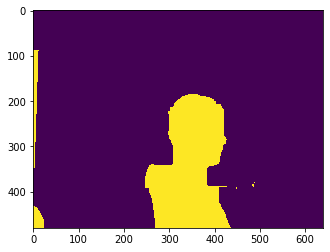

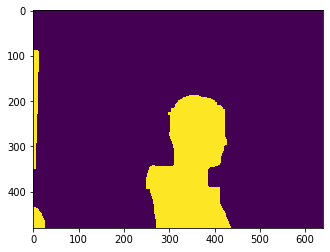

(307200,)
(40789,)
dangling removal done
color filter done.


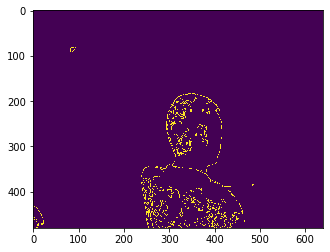

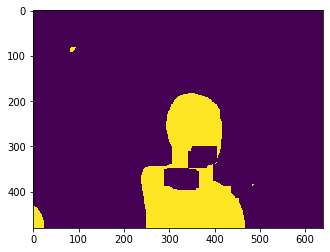

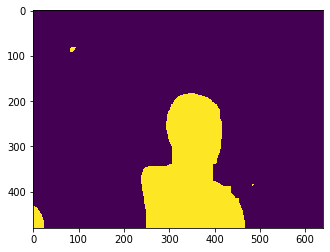

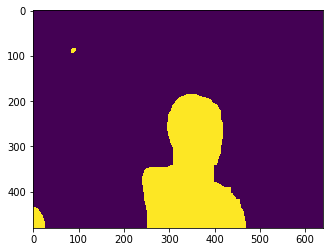

(307200,)
(44172,)
dangling removal done
color filter done.


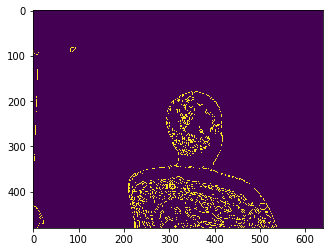

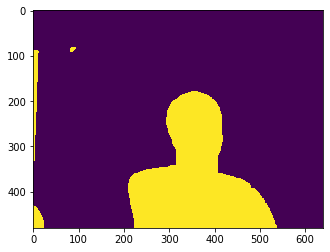

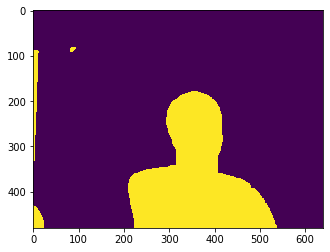

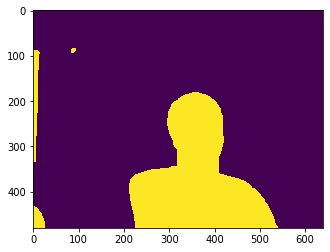

(307200,)
(57094,)
dangling removal done
color filter done.


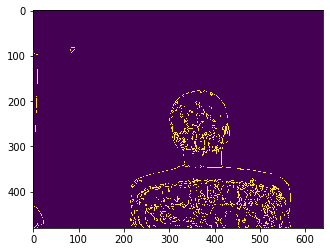

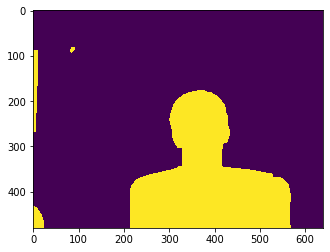

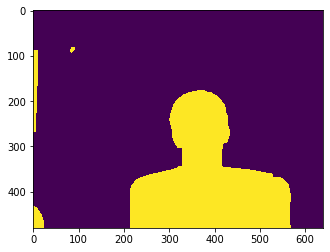

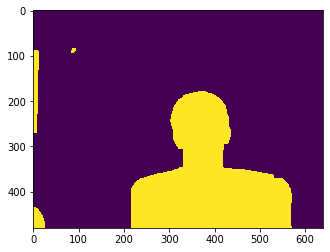

(307200,)
(64695,)
dangling removal done
color filter done.


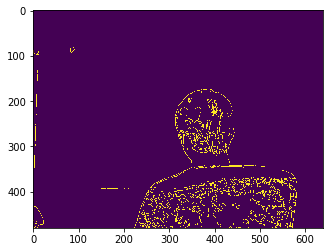

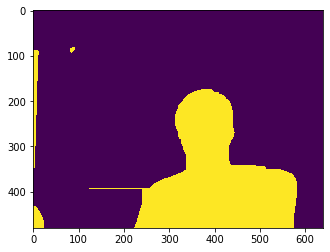

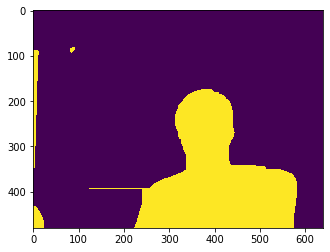

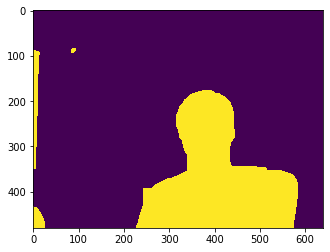

(307200,)
(64704,)
dangling removal done
color filter done.


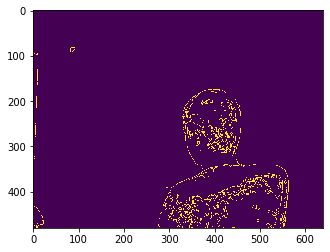

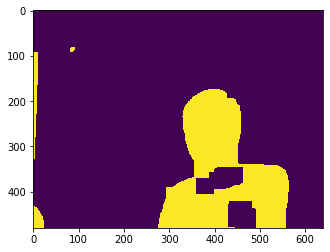

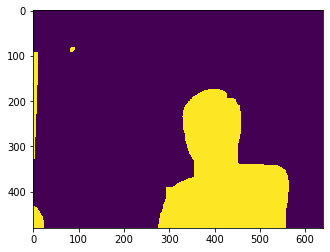

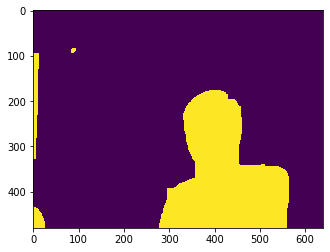

(307200,)
(56603,)
dangling removal done
color filter done.


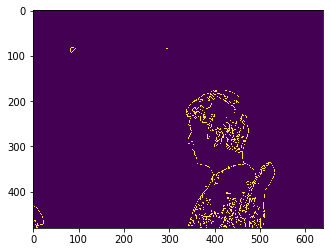

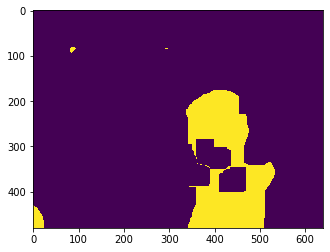

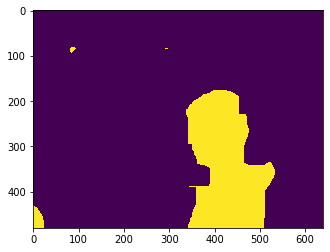

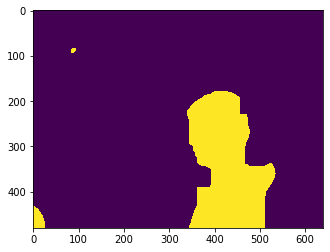

(307200,)
(40728,)
dangling removal done
color filter done.


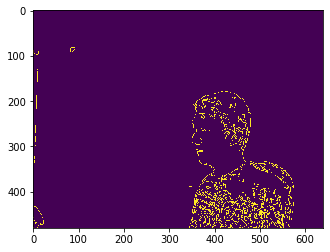

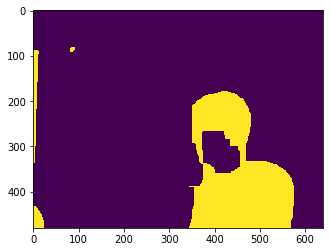

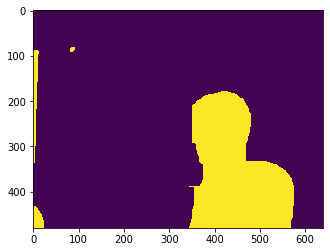

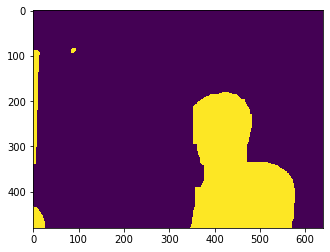

(307200,)
(51074,)
dangling removal done
color filter done.


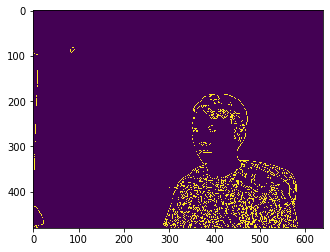

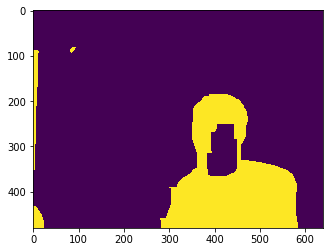

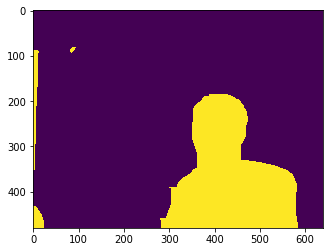

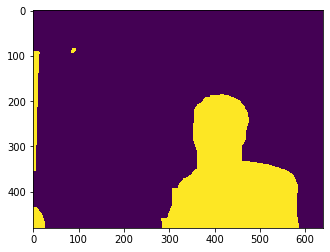

(307200,)
(56981,)
dangling removal done
color filter done.


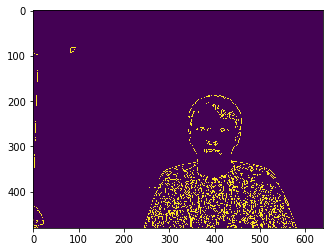

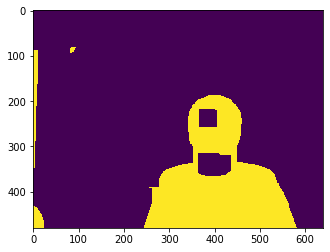

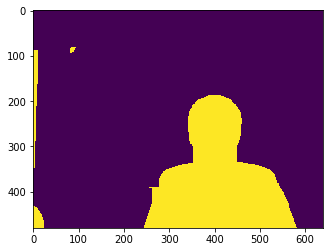

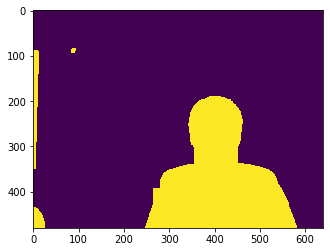

(307200,)
(58656,)
dangling removal done
color filter done.


In [2]:
for i in range(1,16):
    head = HEAD_RECON.threeD_head.read_from_file(1,i)
    head.reset_filters()
    # self.reset_filters()
    head.edge_based_filter()
    head.filter_nan()
    head.filter_depth(1.5)
    head.sparsify(1)
    head.remove_dangling()
    print("dangling removal done")
    head.remove_background_color()
    print("color filter done.")
    head.center()
    head.create_vpython_spheres()
    head.save()

In [3]:
all_heads=[HEAD_RECON.threeD_head.load_from_pickle(1,i) for i in range (1,16)]

In [4]:
def make_mhead(all_heads, first, last):
    all_heads[first].paint([1,0,0])
    all_heads[first].reset_positions()
    all_heads[first].reset_colors()
    all_heads[first+1].reset_positions()
    all_heads[first+1].reset_colors()    
    
    heads = multi_head.MultiHead.joined_heads(all_heads[first], all_heads[first+1])
    heads.icp_transform(0,1)
    for i in range(first+2,last+1):
        all_heads[i].reset_positions()
        all_heads[i].reset_colors()  
        print (i)
        heads.append_head(all_heads[i])
        print("join {}, {}".format(i-1-first,i-first))
        heads.join_heads_wraper(i-1-first,i-first)
        heads.icp_transform(i-1-first,i-first)
    heads.save(sparcity=0.1) 
    print ("completed")
    return heads

In [10]:
make_mhead(all_heads,14,15)

IndexError: list index out of range

In [ ]:
# 10,11 is bad